In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\user\\OneDrive\\Desktop\\Project\\city_day.csv")
delhi = df[df['City'] == 'Delhi']

In [5]:
delhi['Date'] = pd.to_datetime(delhi['Date'])
delhi.set_index('Date', inplace = True)

In [7]:
delhi.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Delhi,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
2015-01-02,Delhi,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
2015-01-03,Delhi,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
2015-01-04,Delhi,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
2015-01-05,Delhi,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


In [9]:
pm25 = delhi['PM2.5']
pm25[pm25.isna()]

Date
2017-08-12   NaN
2017-08-13   NaN
Name: PM2.5, dtype: float64

In [11]:
pm25 = pm25.interpolate(method = 'linear')

<Axes: title={'center': 'PM 2.5'}, xlabel='Date'>

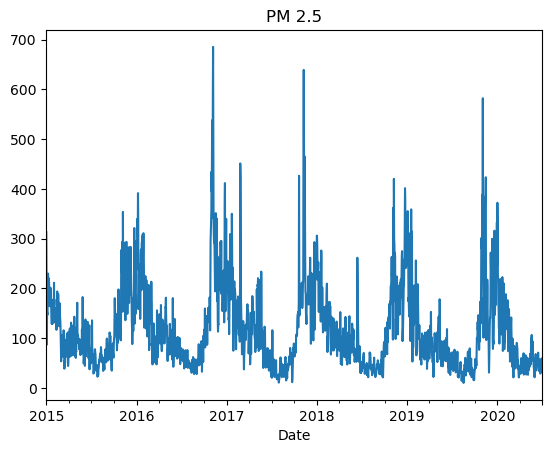

In [13]:
pm25.plot(title = 'PM 2.5')

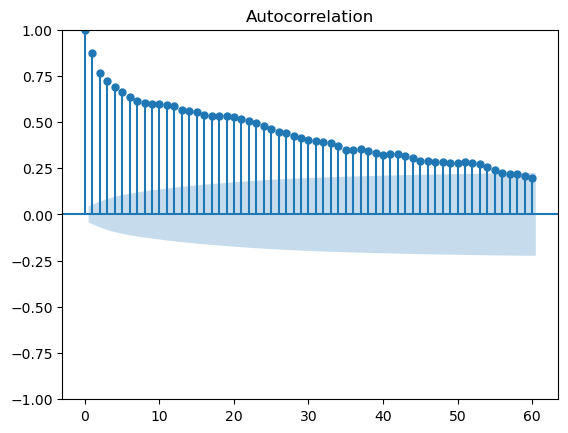

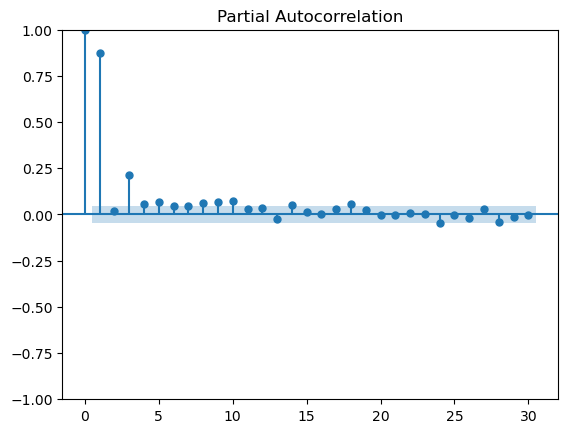

In [15]:
pm25_acf = plot_acf(pm25, lags = 60)
pm25_pacf = plot_pacf(pm25, lags = 30)

In [148]:
train_pm25 = pm25[pm25.index < '2019-01-01']
test_pm25 = pm25[pm25.index >= '2019-01-01']

In [156]:
ps = [1,3,5,10]
for p in ps:
    model = ARIMA(train_pm25, order = (p,0,0)).fit()
    
    predicted = model.predict(start = '2019-01-01', end = '2019-03-01')
    actual = test_pm25[test_pm25.index <= '2019-03-01']
    rmse = ((actual - predicted)**2).mean()**0.5
    mae = abs(actual - predicted).mean()
    print('p = {}, AIC = {}, BIC = {}, Log Livelihood = {}, RMSE = {}, MAE = {}'.format(p, model.aic, model.bic, model.llf, rmse, mae))

p = 1, AIC = 14954.348502174324, BIC = 14970.209131409576, Log Livelihood = -7474.174251087162, RMSE = 68.29758621142291, MAE = 52.344893415080676
p = 3, AIC = 14868.848904167926, BIC = 14895.283286226679, Log Livelihood = -7429.424452083963, RMSE = 63.390975332842594, MAE = 52.294141990986965
p = 5, AIC = 14857.232168108876, BIC = 14894.240302991131, Log Livelihood = -7421.616084054438, RMSE = 63.88501852143921, MAE = 54.28728557342916
p = 10, AIC = 14844.156755141354, BIC = 14907.599272082361, Log Livelihood = -7410.078377570677, RMSE = 75.86552866929638, MAE = 65.35324905353842


In [158]:
model = ARIMA(train_pm25, order = (3,0,0)).fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                 1461
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -7429.424
Date:                Mon, 31 Mar 2025   AIC                          14868.849
Time:                        03:05:48   BIC                          14895.283
Sample:                    01-01-2015   HQIC                         14878.710
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        123.8733     15.203      8.148      0.000      94.075     153.671
ar.L1          0.8591      0.014     62.641      0.000       0.832       0.886
ar.L2         -0.1937      0.021     -9.198      0.0

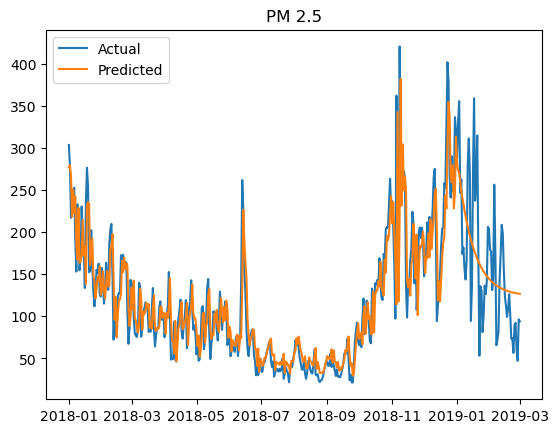

In [164]:
plt.plot(pm25[(pm25.index >= '2018-01-01') & (pm25.index <= '2019-03-01')], label = 'Actual')
plt.plot(model.predict(start = '2018-01-01', end = '2019-03-01'), label = 'Predicted')
plt.title('PM 2.5')
plt.legend()

In [184]:
predicted = model.predict(start = '2019-01-01', end = '2019-03-01')
actual = test_pm25[test_pm25.index <= '2019-03-01']
mae = abs(actual - predicted).mean()
rmse = ((actual - predicted)**2).mean()**0.5
print('MAE = {}, RMSE = {}'.format(mae, rmse))

MAE = 52.294141990986965, RMSE = 63.390975332842594


<Axes: ylabel='Density'>

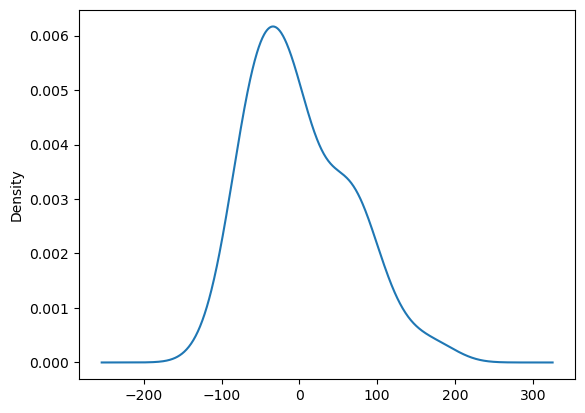

In [180]:
residuals = actual - predicted
residuals.plot(kind = 'kde')